Importing Libraries

In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2


In [3]:

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img



In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [5]:
trainFolder = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'
testFolder =  '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'
valFolder = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val'

In [6]:

def imageSeperation(folder):
    y = []
    x = []
    image_list = []

    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName == "NORMAL":
                label = 0
            elif folderName == "PNEUMONIA":
                label = 1
            else:
                label = 2
                
            for imageName in os.listdir(folder + "/"+ folderName):
                img_file = cv2.imread(folder + "/" + folderName + '/' + imageName,0)               
                

                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    x.append(img_arr)
                    y.append(label)
                    image_list.append(folderName + '/' + imageName)
                                        
    X = np.asarray(x)
    y = np.asarray(y)
    
    

    return X,y,image_list

          
        

In [7]:
xtrain, ytrain, imgTrain = imageSeperation(trainFolder)

trainData = pd.DataFrame(imgTrain, columns=["images"])
trainData["target"] = ytrain


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


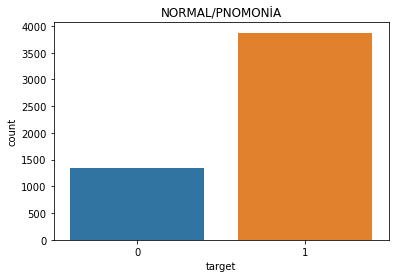

1    3875
0    1341
Name: target, dtype: int64


In [8]:
sns.countplot(trainData["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(trainData["target"].value_counts())

In [9]:
xval, yval, imgval = imageSeperation(valFolder)

valData = pd.DataFrame(imgval, columns=["images"])
valData["target"] = yval

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


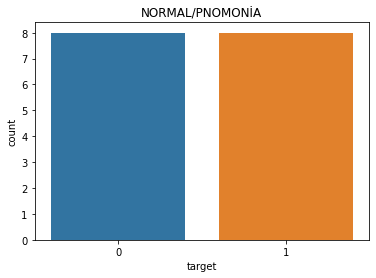

1    8
0    8
Name: target, dtype: int64


In [10]:
sns.countplot(valData["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(valData["target"].value_counts())

In [11]:
xtest, ytest, imgTest = imageSeperation(testFolder)

test_df = pd.DataFrame(imgTest, columns=["images"])
test_df["target"] = ytest

In [12]:
test_df.tail()

,images,target
619,NORMAL/NORMAL2-IM-0338-0001.jpeg,0
620,NORMAL/NORMAL2-IM-0195-0001.jpeg,0
621,NORMAL/NORMAL2-IM-0333-0001.jpeg,0
622,NORMAL/NORMAL2-IM-0150-0001.jpeg,0
623,NORMAL/IM-0010-0001.jpeg,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


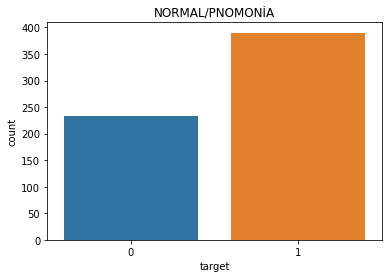

1    390
0    234
Name: target, dtype: int64


In [13]:
sns.countplot(test_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(test_df["target"].value_counts())

In [14]:
 finalData = pd.concat([trainData, test_df, valData], axis=0, ignore_index=True)

In [15]:
print(finalData.head())
print(finalData.tail())

                                 images  target
0  PNEUMONIA/person1180_virus_2010.jpeg       1
1  PNEUMONIA/person1230_virus_2081.jpeg       1
2  PNEUMONIA/person1513_virus_2632.jpeg       1
3    PNEUMONIA/person124_virus_238.jpeg       1
4   PNEUMONIA/person746_virus_1369.jpeg       1
                                images  target
5851  NORMAL/NORMAL2-IM-1427-0001.jpeg       0
5852  NORMAL/NORMAL2-IM-1430-0001.jpeg       0
5853  NORMAL/NORMAL2-IM-1436-0001.jpeg       0
5854  NORMAL/NORMAL2-IM-1438-0001.jpeg       0
5855  NORMAL/NORMAL2-IM-1437-0001.jpeg       0


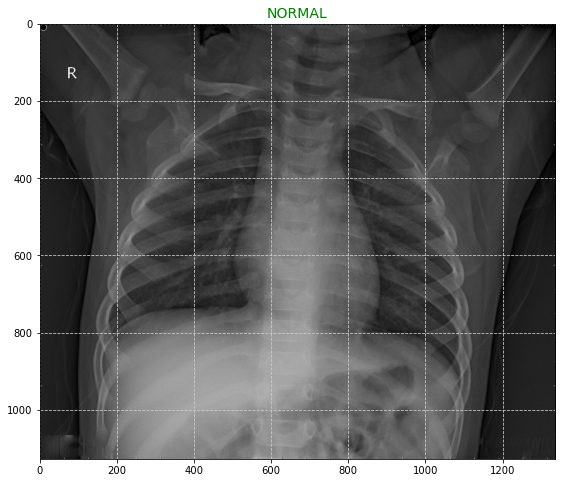

In [16]:
plt.figure(figsize=(12,8))

img = load_img(trainFolder + "/" + finalData["images"][3875])
plt.imshow(img)
plt.title("NORMAL", color = "green", size = 14)
plt.grid(color='#CCCCCC', linestyle='--')
plt.show()

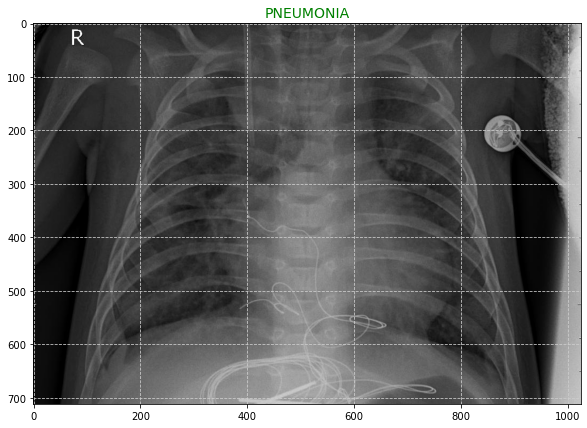

In [17]:
plt.figure(figsize=(10,7))

img = load_img(trainFolder + "/" + finalData["images"][0])
plt.imshow(img)
plt.title("PNEUMONIA", color = "green", size = 14)
plt.grid(color='#CCCCCC', linestyle='--')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


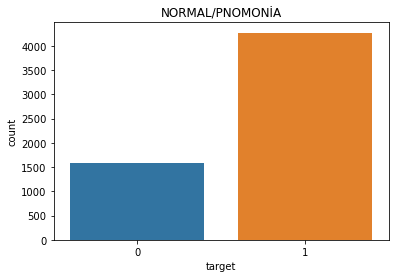

1    4273
0    1583
Name: target, dtype: int64


In [18]:
sns.countplot(finalData["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(finalData["target"].value_counts())


In [20]:
# the shape
xtrain.shape

(5216, 64, 64, 1)

In [21]:
batch_size = 32

Data Augmentation

In [22]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
        trainFolder, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

test_generator = test_datagen.flow_from_directory(
        testFolder, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

val_generator = test_datagen.flow_from_directory(
        valFolder, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Model Building

In [24]:
xtrain.shape[1:]

(64, 64, 1)

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = xtrain.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(1)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [29]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=5216//32,
                    epochs=5,
                    validation_data=test_generator,
                    validation_steps=624//32,
                    callbacks=[early_stopping])
model.save("history")

Epoch 1/5
163/163 [==============================] - 50s 306ms/step - loss: 0.4098 - accuracy: 0.8171 - val_loss: 0.3445 - val_accuracy: 0.8388
Epoch 2/5
163/163 [==============================] - 50s 309ms/step - loss: 0.2829 - accuracy: 0.8792 - val_loss: 0.3659 - val_accuracy: 0.8536
Epoch 3/5
163/163 [==============================] - 50s 306ms/step - loss: 0.2406 - accuracy: 0.9034 - val_loss: 0.2648 - val_accuracy: 0.8832
Epoch 4/5
163/163 [==============================] - 50s 307ms/step - loss: 0.2088 - accuracy: 0.9160 - val_loss: 0.4462 - val_accuracy: 0.8487
Epoch 5/5
163/163 [==============================] - 52s 319ms/step - loss: 0.1942 - accuracy: 0.9264 - val_loss: 0.2451 - val_accuracy: 0.9062


In [30]:
print("Accuracy  - " , model.evaluate_generator(test_generator)[1]*100 , "%")
print("Loss  - " , model.evaluate_generator(test_generator)[0])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy  -  90.54487347602844 %
Loss  -  0.2485375553369522


In [39]:
prediction = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

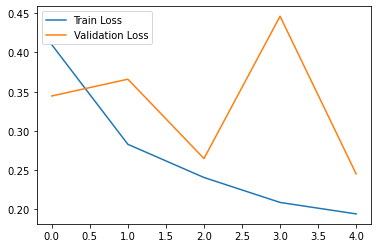

In [33]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

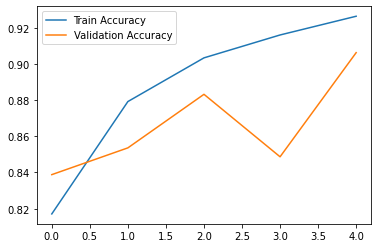

In [34]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()

Some correct predictions and wrong

In [44]:
prediction = model.predict_classes(xtest)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

In [45]:
correct = np.nonzero(prediction == ytest)[0]
incorrect = np.nonzero(prediction != ytest)[0]

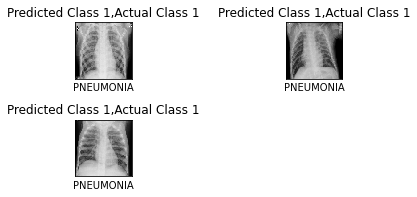

In [47]:
j = 0
for i in correct[:3]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtest[i].reshape(64,64), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], ytest[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1



testing images from google

In [51]:
IMG_SIZE=64
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [52]:
prediction = model.predict([prepare("../input/google/normal.jpeg")])
print(labels[int(prediction[0])])


NORMAL


In [53]:
prediction = model.predict([prepare("../input/google/pneumonia.jpeg")])
print(labels[int(prediction[0])])


PNEUMONIA
